<a href="https://colab.research.google.com/github/jintanabp/ComputerVision/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information Data Science Job Salaries

**ข้อมูล Dataset ประกอบไปด้วย**

* **work_year**: The year the salary was paid
* **experience_level**:
    - EN Entry-level(Junior)
    - MI Mid-level(Intermediate)
    - SE Senior-level(Expert)
    - EX Executive-level(Director)
* **job_title**: The role worked in during the year
* **salary**: The total gross salary amount paid
* **salary_currency**: The currency of the salary paid as an ISO 4217 currency code
* **salary_in_usd**: The salary in USD
* **employee_residence**: Employee's primary country of residence in during the work year
* **remote_ratio**:
    - 0 No remote work (less than 20%)
    - 50 Partially remote
    - 100 Fully remote (more than 80%)
* **company_location**: The country of the mployer's main office or contracting branch
* **company_size**: The average number of people that worked for the company during the year:
    - S (less than 50 employees)
    - M (50-250 employees)
    - L (more than 250 employees)

**เป้าหมายในการทำ Machine Learning** : วิเคราะห์ปัจจัยที่ส่งผลต่อเงินเดือน (salary_in_usd)

**สมมติฐาน** : สามารถทำนายเงินเดือนขั้นต่ำหรือช่วงของเงินเดือนที่สามารถขอกับทางบริษัทในการสมัครงานเกี่ยวกับ Data Science ด้วยปัจจัยต่าง ๆ ที่เกี่ยวข้องกับการทำงาน เช่น ตำแหน่ง สถานที่ทำงาน เป็นต้น

# Import Libraries

นำเข้า Library ที่ใช้

In [ ]:
!pip install pycountry
!pip install country_converter
!pip install pycountry_convert
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import country_converter as coco
import pycountry_convert as pc
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <div id='2' style="text-align: center; background-color: #E76F51; font-family:georgia; color: white; padding: 20px; line-height: 1;border-radius:20px">2. Exploratory Data Analysis 📊 </div>

วัตถุประสงค์ในการ Exploration
* ดูคุณสมบัติโดยรวมของข้อมูล
* ทำการวิเคราะห์แต่ละ feature เพื่อตรวจสอบคุณสมบัติของแต่ละ feature เพิ่มเติม
* ทำการวิเคราะห์ feature เทียบกับ target เพื่อสังเกตความสัมพันธ์ที่เกิดขึ้น

1. ดึงข้อมูล Dataset ที่ใช้เข้ามา

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/Project/ds_salaries.csv')

2. ดูภาพรวมของข้อมูล

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


- มีทั้งหมด 11 features และประกอบด้วย
  - 4 integer types
  - 7 object types

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


3. เนื่องจาก salary และ salary_in_usd เป็นข้อมูลเดียวกันที่ผ่านการคำนวณโดยใช้ salary_currency หรือค่าเงิน เลยเลือกใช้เพียงแค่ salary_in_usd เท่านั้น

In [ ]:
df = df.drop(['salary','salary_currency'], axis=1)

In [ ]:
df = df.reset_index()

4. เช็คว่าข้อมูลมี Missing Values มั้ย

In [ ]:
# Finding how many missing values are there for each column
df.isnull().sum()

index                 0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

5. ทำการ Explore ลงไปในแต่ละ features และเนื่องจาก features ยกเว้น salary_in_usd ที่เป็น Target เป็นข้อมูลแบบ Categorical ทั้งหมดจึงจะดูและวิเคราะห์สัดส่วนของแต่ละ features ในชุดข้อมูลเป็นหลัก

**Salary**

In [ ]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Histogram(x=df['salary_in_usd'], name='Salary Histogram'),row=1, col=1)
fig.add_trace(go.Box(y=df['salary_in_usd'], name='Salary Box Plot'),row=1, col=2)
fig.show()

จากการ Plot พบว่า salary_in_usd มีการกระจายแบบเบ้ขวา
**ซึ่งเป็นการกระจายทั่วไปที่เกิดขึ้นในข้อมูลรายได้** โดยการกระจายในรูปแบบนี้หมายความว่าคนส่วนใหญ่มีรายได้ในช่วงเงินเดือนต่ำหรือปานกลาง และคนส่วนน้อยมีรายได้สูง

In [ ]:
salary_in_usd = df['salary_in_usd']
print('Mean Salary in USD: ', salary_in_usd.values.mean())
print('Median Salary in USD: ', np.median(salary_in_usd.values))
print('Minimum Salary in USD: ', salary_in_usd.values.min())
print('Maximum Salary in USD: ', salary_in_usd.values.max())

Mean Salary in USD:  137570.38988015978
Median Salary in USD:  135000.0
Minimum Salary in USD:  5132
Maximum Salary in USD:  450000


จากการ visualizing salary_in_usd พบว่ามีข้อมูลที่มีความเป็นไปได้ว่าจะเป็น Outlier แต่เนื่องจากเป็นข้อมูลเงินเดือนที่ได้รับมา ซึ่งเป็นข้อมูลที่สมเหตุสมผล เลยเลือกที่จะไม่ลบข้อมูลเหล่านั้นทิ้ง

**Work Year**

In [ ]:
work_year_counts = df['work_year'].value_counts().sort_index()
fig = px.bar(x=work_year_counts.index.astype('str'),y=work_year_counts.values,text=work_year_counts.values,color=work_year_counts.values,)
fig.update_layout(xaxis=dict(title='Year',titlefont_size=16),yaxis=dict(title='Number of Salary Paid',titlefont_size=16))
fig.show()

จาก barplot พบว่าสัดส่วนของข้อมูล salary_in_usd 2023 นั้นสูงที่สุด ในขณะที่สัดส่วนของข้อมูล salary_in_usd 2020 นั้นต่ำที่สุด และจะเห็นว่าในปี 2022 และ 2023 มีแนวโน้มเพิ่มขึ้นสูงอย่างเห็นได้ชัด จึงสามารถวิเคราะห์ได้ว่าในปี 2022 เป็นต้นไป มีการเพิ่มขึ้นของอาชีพที่เกี่ยวข้องกับ Data Science


**Experience Level**

In [ ]:
experience_level_counts = df['experience_level'].value_counts()
fig = go.Figure(data=[go.Pie(values=experience_level_counts.values,labels=['Senior', 'Middle', 'Entry', 'Executive'],textinfo='percent+value',)])
fig.show()

จาก pie chart พบว่า
  - **67%** senior level
  - **21.4%** middle-level
  - **8.52%** entry level
  - **3.04%** executive level

**Employment Type**

In [ ]:
employment_type_counts = df['employment_type'].value_counts()
fig = px.pie(df,values=employment_type_counts.values,names=['Full Time', 'Part Time', 'Contract', 'Freelance'])
fig.show()

จาก bar chart พบว่า **99%** ของข้อมูลเป็นพนักงานแบบ full time

**Job Title**

In [ ]:
top20_job_title = df['job_title'].value_counts().sort_values(ascending=False)[:20]
fig = px.bar(df,x=top20_job_title.index,y=top20_job_title.values,text=top20_job_title.values,color=top20_job_title.values)
fig.update_layout(xaxis=dict(title='Job Title',titlefont_size=16), yaxis=dict(title='Number of Employees',titlefont_size=16), xaxis_tickangle=60,)
fig.update_traces(textfont_size=10)
fig.show()

จาก bar chart พบว่า
- สัดส่วนของพนักงานที่ทำงานเป็น data engineer มีค่าสูงที่สุด
- ตามด้วย data scientist, data analyst, machine learning engineer
- ข้อมูลเกี่ยวกับตำแหน่งงานมีความ**ไม่สมดุล**อย่างมาก เนื่องจากสัดส่วนระหว่างตำแหน่งงานมีความแตกต่างกัน

**Remote Ratio**

In [ ]:
remote_ratio_counts = df['remote_ratio'].value_counts()
fig = go.Figure(data=[go.Pie(labels=['No Remote', 'Fully Remote', 'Partially Remote'],values=remote_ratio_counts.values,hole=.2,textinfo='percent+value')])
fig.show()

จาก bar chart พบว่า
  - **43.8%** fully remote
  - **51.2%** not working remote at all
  - **5.03%** partially remote

**Employee Residence**

In [ ]:
top10_residence= df['employee_residence'].value_counts().sort_values(ascending=False)[:10]
fig = px.bar(df,x=top10_residence.index,y=top10_residence.values,text=top10_residence.values,color=top10_residence.values)
fig.update_layout(xaxis=dict(title='Country',titlefont_size=16), yaxis=dict(title='Number of Employees',titlefont_size=16))
fig.update_traces(textfont_size=12)
fig.show()

จาก bar chart พบว่า
  - สัดส่วน employees residence ที่มากที่สุดคือ **USA**
  - ตามมาด้วย GB CA ES IN ตามลำดับ

**Company Location**


In [ ]:
top10_company_location = df['company_location'].value_counts()[:10]
fig = px.bar(df,x=top10_company_location.index, y=top10_company_location.values, text=top10_company_location.values, color=top10_company_location.values)
fig.update_layout(xaxis=dict(title='Country',titlefont_size=16), yaxis=dict( title='Number of Companies', titlefont_size=16),)
fig.update_traces(textfont_size=12)
fig.show()

จาก bar chart พบว่า
  - สัดส่วน company_location ที่มากที่สุดคือ **USA**
  - ตามมาด้วย GB CA ES IN ตามลำดับ

In [ ]:
df.head()

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


จากการสำรวจข้อมูล employee_residence และ company_location พบว่ามีข้อมูลที่ผิดพลาดอยู่ เช่น ที่ทำงานอยู่ประเทศหนึ่ง ที่อยู่อาศัยอยู่อีกประเทศหนึ่ง โดยไม่ได้มีการทำงานแบบ Remote จะเห็นได้ว่าข้อมูลเหล่านี้เป็นข้อมูลที่ผิดพลาด จึงทำการตัดข้อมูลนี้ทิ้งไป

In [ ]:
# Variable generation according to employee and company location
a = []
for (i, j) in zip(df['employee_residence'], df['company_location']):
    if i == j:
        a.append('Yes')
    else:
        a.append('No')

df['work in own country'] = a

In [ ]:
df

,index,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work in own country
0,0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L,Yes
1,1,2023,MI,CT,ML Engineer,30000,US,100,US,S,Yes
2,2,2023,MI,CT,ML Engineer,25500,US,100,US,S,Yes
3,3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M,Yes
4,4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M,Yes
...,...,...,...,...,...,...,...,...,...,...,...
3750,3750,2020,SE,FT,Data Scientist,412000,US,100,US,L,Yes
3751,3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L,Yes
3752,3752,2020,EN,FT,Data Scientist,105000,US,100,US,S,Yes
3753,3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L,Yes


In [ ]:
# Variable generation according to employee and company location
b = []
for (i, j) in zip(df['work in own country'], df['remote_ratio']):
    if i == 'No' and ( j == 100 or j == 50):
        b.append('Yes')
    elif i == "Yes":
        b.append('Yes')
    else:
      b.append('No')

df['check'] = b
df = df[df['check'] != 'No']

**Company Size**

In [ ]:
company_size_counts = df['company_size'].value_counts()
fig = go.Figure(data=[go.Pie(labels=['Middle', 'Large', 'Small'],values=company_size_counts.values,hole=.3,textinfo='percent+value')])
fig.show()

 - **84.1%** Middle Size
 - **12%** Large Size
 - **3.95%** Small Size

**Conclusion on Feature Analysis**

- สัดส่วนข้อมูล salary เพิ่มขึ้นตั้งแต่ปี 2022.

- สัดส่วน Experience Level ที่มากที่สุดคือ senior level และน้อยที่สุดคือ executive level ที่มีเพียง 4.28% จากข้อมูลทั้งหมด

- 98.7% ของข้อมูลทั้งหมดเป็นพนักงานแบบ Fulltime

- ตำแหน่งงานที่มีจำนวนมากที่สุดได้แต่ Data Scientist ตามด้วย Data Engineer และ Data Analyst

- สัดส่วน employees residence และ companies location ที่เยอะที่สุดคือ US

- 46.4% ทำงานแบบ fully remote.

- ข้อมูล Company Size ที่มากที่สุดและมีค่ามากกว่าครึ่งนึงของข้อมูลทั้งหมดคือ middle-sized companies

จากข้อมูลข้างต้น ทำให้เราเลือกที่จะนำข้อมูลของพนักงาน Fulltime ที่มีมากถึง 98.7% ของข้อมูลมาใช้งานเพียงอย่างเดียว

In [ ]:
df = df[df['employment_type'] == 'FT']
df = df.drop(['employment_type'], axis=1)

6. เปรียบเทียบและหาความสัมพันธ์ของ features กับ target (salary_in_usd) และ features กับ features ที่น่าสนใจ

**Work Year and Salary**

In [ ]:
fig = px.box(df,x='work_year',y='salary_in_usd',color='work_year')
fig.update_layout(xaxis=dict(title='work_year',titlefont_size=16), yaxis=dict(title='Salary in USD',titlefont_size=16))
fig.show()

boxplot ไม่ได้อยู่ในแนวเดียวกัน **เลือก feature ไปใช้ต่อ**

In [ ]:
salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

fig = px.line(df,x=salary_by_year.index.astype('str'),y=salary_by_year.values,text=np.round(salary_by_year.values,3))
fig.update_layout(xaxis=dict(title='Year',titlefont_size=16),yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.show()

จาก line chart พบว่าค่า mean salary in USD **เพิ่มขึ้น**ในปี 2020-2023 และ**เพิ่มอย่างเห็น**ได้ชัดในปี 2021-2022 และ 2022-2023

**Experience Level and Salary**

In [ ]:
fig = px.box(df,x='experience_level',y='salary_in_usd',color='experience_level')
fig.update_layout(xaxis=dict(title='experience_level',titlefont_size=16), yaxis=dict(title='Salary in USD',titlefont_size=16))
fig.show()

boxplot ไม่ได้อยู่ในแนวเดียวกัน **เลือก feature ไปใช้ต่อ**

In [ ]:
salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True)

fig = go.Figure(data=[go.Bar(x=['Entry', 'Middle', 'Senior', 'Executive'], y=salary_by_experience.values, text=np.round(salary_by_experience.values, 3),)])
fig.update_layout(xaxis=dict(title='Experience Level',titlefont_size=16), yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.show()

จาก barplot พบว่า Experience Level มีความสัมพันธ์แบบแปรผันตรงกับ Salary โดยที่หาก Experience Level หรือตำแหน่งงานสูงขึ้น Salary หรือเงินเดือนที่ได้รับก็จะเพิ่มขึ้น

**Experience Level and Workyear**

In [ ]:
import pandas as pd
import plotly.graph_objs as go

grouped_data = df.groupby(['work_year', 'experience_level']).size().reset_index(name='count')

# Creating a pivot table for better visualization
pivot_table = grouped_data.pivot(index='work_year', columns='experience_level', values='count').fillna(0)

# Plotting a stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Senior', x=pivot_table.index, y=pivot_table['SE']),
    go.Bar(name='Middle', x=pivot_table.index, y=pivot_table['MI']),
    go.Bar(name='Entry', x=pivot_table.index, y=pivot_table['EN']),
    go.Bar(name='Executive', x=pivot_table.index, y=pivot_table['EX'])
])

# Update layout
fig.update_layout(barmode='stack',xaxis_title='Work Year', yaxis_title='Count')
fig.show()


จะเห็นได้ว่าจำนวนตำแหน่งงานที่เพิ่มขึ้นอย่างมากในปี 2022และ2023 คือ Senior ซึ่งไม่ใช่คนจบใหม่หรือคนที่พึ่งเริ่มทำงานในปีนั้น ๆ แต่เป็นคนที่ผ่านการทำงานมาก่อนแล้ว แสดงให้เห็นว่าในปี 2022 เป็นต้นมามีคนย้ายสายมาทำงาน Data Science เป็นจำนวนมาก ซึ่งอาจจะหมายความว่าข้อมูลเงินเดือนนี้ยังขาดบาง Feature ที่สำคัญเช่น ความสามารถหรือทักษะในการทำงานต่าง ๆ ที่ส่งผลต่อเงินเดือน

**Job Title and Salary**

In [ ]:
top10_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
salary_by_title = pd.concat([top10_salary_by_title, low10_salary_by_title])

fig = px.bar(df,x=salary_by_title.index,y=salary_by_title.values,color=salary_by_title.values,text=np.round(salary_by_title.values))
fig.update_layout(xaxis=dict(title='Job Title',titlefont_size=16),yaxis=dict(title='Mean Salary in USD',titlefont_size=16))

fig.update_traces(textfont_size=8)
fig.show()

จาก bar chart พบว่า
- data science tech lead ได้รับเงินเดือนมากที่สุดอยู่ที่ 375K
- power BI developer ได้รับเงินเดือนน้อยที่สุดอยู่ที่ 5409

ซึ่งจะเห็นว่ามีความแตกต่างกันอย่างเห็นได้ชัด

In [ ]:
titles = salary_by_title.index.tolist()
salary_by_title_df = df.loc[df.apply(lambda x: x.job_title in titles, axis=1)]

In [ ]:
fig = px.box(salary_by_title_df,x='job_title',y='salary_in_usd',color='job_title',category_orders={'job_title': titles})

fig.update_layout(xaxis=dict(title='Job Title',titlefont_size=16),yaxis=dict(title='Mean Salary in USD',titlefont_size=16),)
fig.show()

จาก bar chart ที่แสดงเงินเดือนเฉลี่ยตามตำแหน่งงานพบว่า : พนักงานที่ทำงานเป็นหัวหน้าฝ่ายเทคโนโลยีวิทยาศาสตร์ data science tech lead จะได้รับเงินเดือนโดยเฉลี่ยมากที่สุด ในขณะที่พนักงานที่ทำงานเป็นนักพัฒนา Power BI Devoloper จะได้รับเงินเดือนเฉลี่ยน้อยที่สุด แต่จะเห็นว่าข้อมูลของ data science tech lead และ Power BI Devoloper มีเพียง 1 ข้อมูลเท่านั้น **หมายความว่า** ข้อมูลเงินเดือนของ data science tech lead และ Power BI Devoloper อาจไม่ได้สามารถ represent เงินเดือนของพนักงานที่ทำงาน data science tech lead และ Power BI Devoloper ได้

และจากการวิเคราะห์ข้างต้นแล้ว เนื่องจากมีตำแหน่งงานมากเกินไป แต่จะเห็นได้ว่าเราสามารถแบ่งงานออกเป็น 10 หมวดหมู่ใหญ่ ได้แก่
1. data scientist
2. data engineer
3. data analyst
4. data manager
5. developer
6. data architect
7. data lead
8. data researcher
9. data consultant
10. data specialist

ซึ่งการแบ่งกลุ่มนี้จะช่วยให้วิเคราะห์ข้อมูลและสรุปเงินเดือนที่ได้รับได้มากขึ้น และยังสามารถเพิ่มความแม่นยำในการวิเคราะห์ได้เนื่องงานจำนวนข้อมูลในแต่ละหมวดหมู่มีมากขึ้น

In [ ]:
def classified_job_title(df):
    for row in df.itertuples():
        job_title = row.job_title
        row_index = row.index
        if ('Scientist' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Scientist'
        elif ('Engineer' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Engineer'
        elif ('Analyst' in job_title or 'Strategist' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Analyst'
        elif ('Manager' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Manager'
        elif ('Developer' in job_title or 'Programmer' in job_title or 'Technician' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Developer'
        elif ('Architect' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Architect'
        elif ('Head' in job_title or 'Lead' in job_title or 'Director' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Lead'
        elif ('Researcher' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Researcher'
        elif ('Consultant' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Consultant'
        elif ('Specialist' in job_title):
            df.loc[df.index == row_index, 'job_title_classified'] = 'Data Specialist'
    return df

In [ ]:
df = classified_job_title(df)

In [ ]:
salary_by_title = df.groupby('job_title_classified')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,x=salary_by_title.index,y=salary_by_title.values,color=salary_by_title.values,text=np.round(salary_by_title.values))
fig.update_layout(xaxis=dict(title='Job Title',titlefont_size=16),yaxis=dict(title='Mean alary in USD',titlefont_size=16))
fig.update_traces(textfont_size=8)
fig.show()

In [ ]:
classified_titles = salary_by_title.index.tolist()
salary_by_classified_title_df = df.loc[df.apply(lambda x: x.job_title_classified in classified_titles, axis=1)]

In [ ]:
fig = px.box(salary_by_classified_title_df,x='job_title_classified',y='salary_in_usd',color='job_title_classified',category_orders={'job_title_classified': classified_titles})
fig.update_layout(xaxis=dict(title='Job Title',titlefont_size=16),yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.show()

จาก bar plot พบว่า
- data lead มีค่าเฉลี่ยเงินเดือนสูงที่สุด
- data researcher มีค่าเฉลี่ยเงินเดือนน้อยที่สุด

**Employee Residence and Salary**

In [ ]:
top10_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_residence = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
salary_by_residence = pd.concat([top10_salary_by_residence, low10_salary_by_residence])

fig = px.bar(df,x=salary_by_residence.index,y=salary_by_residence.values,color=salary_by_residence.values,text=np.round(salary_by_residence.values))
fig.update_layout(xaxis=dict(title='Country',titlefont_size=16),yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.update_traces(textfont_size=8)
fig.show()

In [ ]:
residence = salary_by_residence.index.tolist()
salary_by_residence_df = df.loc[df.apply(lambda x: x.employee_residence in residence, axis=1)]

In [ ]:
fig = px.box(salary_by_residence_df,x='employee_residence',y='salary_in_usd',color='employee_residence',category_orders={'employee_residence': residence})
fig.update_layout(xaxis=dict(title='Country',titlefont_size=16), yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.show()

จาก bar chart ที่แสดงเงินเดือนเฉลี่ยแยกตามสถานที่อยู่ของพนักงาน  พบว่า
- พนักงานที่อาศัยอยู่ในอิสราเอล (IL) จะได้รับเงินเดือนโดยเฉลี่ยมากที่สุด
- พนักงานที่อาศัยอยู่ในมาซิโดเนีย (MK) จะได้รับเงินเดือนเฉลี่ยต่ำที่สุด

แต่จาก barplot พบว่าข้อมูลของอิสราเอลและมาซิโดเนียมีเพียง 1 ข้อมูลเท่านั้น **หมายความว่า** เงินเดือนของพนักงานที่อาศัยในอิสราเอลและมาซิโดเนียอาจไม่สามารถ represent เงินเดือนของพนักงานที่อาศัยอยู่ในประเทศนั้นได้จริง ๆ จึงได้ทำการแบ่งกลุ่มออกเป็นทวีปตามมาตรฐานของ ISO2

In [ ]:
df['employee_residence'] = coco.convert(names=df['employee_residence'], to='ISO2')
df['residence_continent'] = df['employee_residence'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [ ]:
salary_by_residence_continent = df.groupby('residence_continent')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,x=salary_by_residence_continent.index,y=salary_by_residence_continent.values,color=salary_by_residence_continent.values,text=np.round(salary_by_residence_continent.values))
fig.update_layout(xaxis=dict(title='Continent',titlefont_size=16), yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.show()

In [ ]:
residence_continent = salary_by_residence_continent.index.tolist()
salary_by_residence_continent_df = df.loc[df.apply(lambda x: x.residence_continent in residence_continent, axis=1)]

In [ ]:
fig = px.box(salary_by_residence_continent_df,x='residence_continent',y='salary_in_usd',color='residence_continent',category_orders={'residence_continent': residence_continent})
fig.update_layout(xaxis=dict(title='Continent',titlefont_size=16),yaxis=dict(title='Mean Salary in USD',titlefont_size=16),)
fig.show()

- ทวีป North America ได้รับเงินเดือนเฉลี่ยสูงสุด
- ทวีป Africa ได้รับเงินเดือนเฉลี่ยน้อยที่สุด

**Remote Ratio and Salary**

In [ ]:
fig = px.box(df,x='remote_ratio',y='salary_in_usd',color='remote_ratio')
fig.update_layout(xaxis=dict(title='remote_ratio',titlefont_size=16), yaxis=dict(title='Salary in USD',titlefont_size=16))
fig.show()

In [ ]:
salary_by_remote = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=True)
fig = go.Figure(data=[go.Bar(x=['Partially Remote', 'Fully Remote', 'No Remote'],y=salary_by_experience.values,text=np.round(salary_by_experience.values,3))])
fig.update_layout(xaxis=dict(title='Remote Ratio',titlefont_size=16), yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.show()

- partially remote ได้รับเงินเดือนเฉลี่ยน้อยที่สุด
- no remote ได้รับเงินเดือนเฉลี่ยมากที่สุด

**Company Location and Salary**

In [ ]:
top10_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
low10_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[-10:]
salary_by_company_location = pd.concat([top10_salary_by_company_location, low10_salary_by_company_location])

fig = px.bar(df,x=salary_by_company_location.index,y=salary_by_company_location.values,color=salary_by_company_location.values,text=np.round(salary_by_company_location.values))
fig.update_layout(xaxis=dict(title='Country',titlefont_size=16), yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.update_traces(textfont_size=8)
fig.show()

In [ ]:
company_location = salary_by_company_location.index.tolist()
salary_by_company_location_df = df.loc[df.apply(lambda x: x.company_location in company_location, axis=1)]

In [ ]:
fig = px.box(salary_by_company_location_df,x='company_location',y='salary_in_usd',color='company_location',category_orders={'company_location': company_location})
fig.update_layout(xaxis=dict(title='Country',titlefont_size=16), yaxis=dict( title='Salary in USD',titlefont_size=16))
fig.show()

จาก bar chart ที่แสดงเงินเดือนเฉลี่ยแยกตามสถานที่ของ Company พบว่า

Company ในอิสราเอล (IL) จะได้รับเงินเดือนโดยเฉลี่ยมากที่สุด
Company ในมาซิโดเนีย (MK) จะได้รับเงินเดือนเฉลี่ยต่ำที่สุด
แต่จาก barplot พบว่าข้อมูลของอิสราเอลและมาซิโดเนียมีเพียง 1 ข้อมูลเท่านั้น หมายความว่า เงินเดือนของพนักงานที่ทำงานในอิสราเอลและมาซิโดเนียอาจไม่สามารถ represent เงินเดือนของพนักงานที่ทำงานอยู่ในประเทศนั้นได้จริง ๆ จึงได้ทำการแบ่งกลุ่มออกเป็นทวีปตามมาตรฐานของ ISO2

In [ ]:
df['company_location'] = coco.convert(names=df['company_location'], to='ISO2')
df['company_continent'] = df['company_location'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [ ]:
salary_by_company_continent = df.groupby('company_continent')['salary_in_usd'].mean().sort_values(ascending=False)

fig = px.bar(df,x=salary_by_company_continent.index,y=salary_by_company_continent.values,color=salary_by_company_continent.values,text=np.round(salary_by_company_continent.values,3))
fig.update_layout(xaxis=dict(title='Continent',titlefont_size=16), yaxis=dict( title='Mean Salary in USD',titlefont_size=16))
fig.show()

In [ ]:
company_continent = salary_by_company_continent.index.tolist()
salary_by_company_continent_df = df.loc[df.apply(lambda x: x.company_continent in company_continent, axis=1)]

In [ ]:
fig = px.box(salary_by_company_continent_df,x='company_continent',y='salary_in_usd',color='company_continent',category_orders={'company_continent': company_continent})
fig.update_layout(xaxis=dict(title='Continent',titlefont_size=16), yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.show()

- ทวีป North America ได้รับเงินเดือนเฉลี่ยสูงสุด
- ทวีป South America ได้รับเงินเดือนเฉลี่ยน้อยที่สุด

**Company size and Salary**

In [ ]:
fig = make_subplots(rows=1, cols=2)

salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=True)

salary_by_small = df.loc[df['company_size']=='S']
salary_by_middle = df.loc[df['company_size']=='M']
salary_by_large = df.loc[df['company_size']=='L']

fig.add_trace(go.Bar(x=['Small', 'Large', 'Middle'],y=salary_by_company_size.values,name='Bar Chart',text=np.round(salary_by_company_size.values)),row=1, col=1)
fig.add_trace(go.Box(y=salary_by_small['salary_in_usd'], name='Small'),row=1, col=2)
fig.add_trace(go.Box(y=salary_by_middle['salary_in_usd'], name='Large'),row=1, col=2)
fig.add_trace(go.Box(y=salary_by_large['salary_in_usd'], name='Middle'),row=1, col=2)
fig.show()

- middle-sized company มีค่าเฉลี่ยเงินเดือนสูงสุด

7. ใช้ ANOVA เพื่อดูค่า P-Value ของแต่ละ features เทียบกับ target

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['work_year', 'experience_level', 'job_title', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size','job_title_classified',
       'residence_continent', 'company_continent']
FunctionAnova(inpData=df,
              TargetVariable='salary_in_usd',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

work_year is correlated with salary_in_usd | P-Value: 1.452390471586734e-43
experience_level is correlated with salary_in_usd | P-Value: 1.4151196461198673e-170
job_title is correlated with salary_in_usd | P-Value: 7.275424436188207e-73
salary_in_usd is correlated with salary_in_usd | P-Value: 0.0
employee_residence is correlated with salary_in_usd | P-Value: 5.206814790512315e-205
remote_ratio is correlated with salary_in_usd | P-Value: 5.454233016887643e-38
company_location is correlated with salary_in_usd | P-Value: 3.5306288122514026e-196
company_size is correlated with salary_in_usd | P-Value: 8.472850097223947e-41
job_title_classified is correlated with salary_in_usd | P-Value: 5.399137793605779e-61
residence_continent is correlated with salary_in_usd | P-Value: 4.14077775879843e-224
company_continent is correlated with salary_in_usd | P-Value: 5.4572061107688447e-216


['work_year',
 'experience_level',
 'job_title',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size',
 'job_title_classified',
 'residence_continent',
 'company_continent']

# Preprocessing and Modeling #1

จากการวิเคราะห์ features ทั้งหมดเราได้เลือก features ที่จะใช้ดังนี้

In [ ]:
Data1 = df.copy()

In [ ]:
Data1 = Data1.drop(['index','job_title','employee_residence','company_location','work in own country','check','experience_level'], axis=1)

จากสมมติฐานที่ได้ตั้งไว้ว่า : สามารถทำนายเงินเดือนขั้นต่ำหรือช่วงของเงินเดือนที่สามารถขอกับทางบริษัทในการสมัครงานเกี่ยวกับ Data Science ด้วยปัจจัยต่าง ๆ ที่เกี่ยวข้องกับการทำงาน เช่น ตำแหน่ง สถานที่ทำงาน ทำให้เราเลือกที่จะแบ่งข้อมูลในปีอดีต 2020-2022 ไปใช้ในการ Train และนำข้อมูลในปี 2023 ไปใช้เป็นข้อมูลในการ Test เพื่อตรวจสอบว่าเราจะสามารถนำข้อมูลที่มีอยู่มาใช้ในการทำนายเงินเดือนได้

In [ ]:
SelectedColumns=['work_year','remote_ratio',
       'company_size','job_title_classified',
       'residence_continent', 'company_continent']

Predictors=['remote_ratio',
       'company_size','job_title_classified',
       'residence_continent', 'company_continent']

Target = 'salary_in_usd'

In [ ]:
Data1 = pd.get_dummies(Data1, columns=Predictors, drop_first=False)

In [ ]:
features = Data1.copy()

x = pd.DataFrame(features)
y = pd.DataFrame(features['salary_in_usd'])

In [ ]:
train_data = x[x['work_year'].isin([2020, 2021, 2022])]
test_data = x[x['work_year'] == 2023]

train_data = train_data.drop(['work_year'], axis=1)
test_data = test_data.drop(['work_year'], axis=1)

In [ ]:
# Separate features (X) and target (y)
X_train = train_data.drop('salary_in_usd', axis=1)  # Replace 'target_column_name' with your actual target column
y_train = train_data['salary_in_usd']  # Replace 'target_column_name' with your actual target column

X_test = test_data.drop('salary_in_usd', axis=1)  # Replace 'target_column_name' with your actual target column
y_test = test_data['salary_in_usd']  # Replace 'target_column_name' with your actual target column

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1933, 28)
(1933,)
(1779, 28)
(1779,)


โดยจะใช้ Model Linear Regression เนื่องจากข้อมูล Target ของเราหรือเงินเดือนเป็นข้อมูลแบบ Continuous

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)
# Creating the model on Training Data
LREG = RegModel.fit(X_train,y_train)
# LREG_classifies=RegModel.fit(X_train_classifies,y_train_classifies)


LinearRegression()


In [ ]:
print("Training result prediction")
TrainingPrediction=LREG.predict(X_train)
print("Testing result prediction")
TestingPrediction=LREG.predict(X_test)

Training result prediction
Testing result prediction


In [ ]:
TrainingDataResults=pd.DataFrame(data=X_train, columns=X_train.columns)
TrainingDataResults[Target]=y_train
TrainingDataResults[('Predicted'+Target)]= TrainingPrediction

TestingDataResults=pd.DataFrame(data=X_test, columns=X_test.columns)
TestingDataResults[Target]=y_test
TestingDataResults[('Predicted'+Target)]= TestingPrediction

#Result #1

In [ ]:
TrainingDataResults

,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_size_L,company_size_M,company_size_S,job_title_classified_Data Analyst,job_title_classified_Data Architect,job_title_classified_Data Consultant,job_title_classified_Data Engineer,...,residence_continent_OC,residence_continent_SA,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NA,company_continent_OC,company_continent_SA,salary_in_usd,Predictedsalary_in_usd
41,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,20984,27136.0
83,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,300000,10752.0
114,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,56536,64256.0
249,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,88256,83712.0
323,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,275000,123904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,165000,138240.0
3750,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,412000,160256.0
3751,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,151000,160256.0
3752,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,105000,144384.0


In [ ]:
TestingDataResults

,remote_ratio_0,remote_ratio_50,remote_ratio_100,company_size_L,company_size_M,company_size_S,job_title_classified_Data Analyst,job_title_classified_Data Architect,job_title_classified_Data Consultant,job_title_classified_Data Engineer,...,residence_continent_OC,residence_continent_SA,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NA,company_continent_OC,company_continent_SA,salary_in_usd,Predictedsalary_in_usd
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,85847,83712.0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,175000,159232.0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,120000,159232.0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,222200,159232.0
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,136000,159232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,134500,156160.0
1817,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,130000,158208.0
1818,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,90000,158208.0
1819,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,160000,155136.0


In [ ]:
Predictors = X_train.columns
Predictors = Predictors.drop(['salary_in_usd',
       'Predictedsalary_in_usd'])

In [ ]:
from sklearn import metrics
# Measuring Goodness of fit in Training data by R square
print('R2 Value of training set:',metrics.r2_score(TrainingDataResults[Target], LREG.predict(TrainingDataResults[Predictors])))
print('R2 Value of testing set:',metrics.r2_score(TestingDataResults[Target], LREG.predict(TestingDataResults[Predictors])))

#Measuring Goodness of fit in Training data by MAPE
TrainingDataResults['APE']=100 * ((abs(TrainingDataResults['salary_in_usd']-TrainingDataResults['Predictedsalary_in_usd']))/TrainingDataResults['salary_in_usd'])
MAPE_training=np.mean(TrainingDataResults['APE'])
TestingDataResults['APE']=100 * ((abs(TestingDataResults['salary_in_usd']-TestingDataResults['Predictedsalary_in_usd']))/TestingDataResults['salary_in_usd'])
MAPE_teating=np.mean(TestingDataResults['APE'])
print('MAPE on training data:', MAPE_training)
print('MAPE on test data:', MAPE_teating)
print('Accuracy on training data:', 100-MAPE_training)
print('Accuracy on test data:', 100-MAPE_teating)

R2 Value of training set: 0.38303985751758973
R2 Value of testing set: -1.5259594046501103e+24
MAPE on training data: 42.43511417421935
MAPE on test data: 2253800226941.418
Accuracy on training data: 57.56488582578065
Accuracy on test data: -2253800226841.418


# Result Analysis #1

* R2 Value of training set: 0.42020291116669706

* R2 Value of testing set: -1.0401595275869042e+24

* MAPE on training data: 40.02910272272914

* MAPE on test data: 1860775177229.4158

* Accuracy on training data: 59.97089727727086

* Accuracy on test data: -1860775177129.4158

จะเห็นว่า R2 ของข้อมูล Test มีค่าติดลบ แสดงว่าโมเดลไม่สามารถทำนายได้หรือทำนายได้แย่ ซึ่งสาเหตุอาจมาจากเทรนที่ต่างกันของข้อมูลในปี 2020-2021 ที่เป็น train กับ 2023 ที่เป็น test ดังกราฟที่เห็นจากการ Explore ซึ่งเทรนต่างกันในแต่ละปีขึ้นอยู่กับอัตราเงินเฟ้อที่เปลี่ยนแปลงไปในแต่ละปี เราจึงเลือกที่จะนำอัตราเงินเฟ้อเข้ามาเพื่อปรับให้ข้อมูลเงินเดือนอยู่ในฐานปีเดียวกันคือปี 2023

In [ ]:
salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

fig = px.line(df,x=salary_by_year.index.astype('str'),y=salary_by_year.values,text=np.round(salary_by_year.values,3),title='Mean Salary by Year')
fig.update_layout(xaxis=dict(title='Year',titlefont_size=16),yaxis=dict(title='Mean Salary in USD',titlefont_size=16))
fig.show()

หรืออาจจะเป็นปัจจัยของการเปลี่ยนแปลงตำแหน่งงานทำให้ได้รับเงินเดือนที่สูงขึ้น แต่เมื่อดูจากข้อมูลที่ Explore แล้วพบว่าตำแหน่งงานที่มีจำนวนเปลี่ยนแปลงไปมากหรือเพิ่มขึ้นอย่างเห็นได้ชัดคือ Senior เท่านั้น ทำให้ไม่ใช่การเลื่อนขั้นตำแหน่งงานที่ทำให้เงินเดือนมีเทรนที่แตกต่างกัน

In [ ]:
grouped_data = df.groupby(['work_year', 'experience_level']).size().reset_index(name='count')

# Creating a pivot table for better visualization
pivot_table = grouped_data.pivot(index='work_year', columns='experience_level', values='count').fillna(0)

# Plotting a stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Senior', x=pivot_table.index, y=pivot_table['SE']),
    go.Bar(name='Middle', x=pivot_table.index, y=pivot_table['MI']),
    go.Bar(name='Entry', x=pivot_table.index, y=pivot_table['EN']),
    go.Bar(name='Executive', x=pivot_table.index, y=pivot_table['EX'])
])

# Update layout
fig.update_layout(barmode='stack',xaxis_title='Work Year', yaxis_title='Count')
fig.show()

# Preprocessing and Modeling #2

อ้างอิงข้อมูลอัตราเงินเฟ้อจาก https://ycharts.com/indicators/us_inflation_rate

In [ ]:
# อัตราเงินเฟ้อในแต่ละปีเทียบกับ 2023
inflation_rate_us = {2019: 0.0180, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
#ไม่ได้ใช้ global แล้ว
inflation_rate_global = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}

def salary_adjustment(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = 'salary_currency'

    if year == 2023:
        return original_salary
    adjusted_salary = original_salary
    for i in range(year, 2023):
        if currency == 'USD':
            inflation_rate = inflation_rate_us[i]
        else:
            inflation_rate = inflation_rate_global[i]

        adjusted_salary = adjusted_salary * (1 + inflation_rate)
    return adjusted_salary

df['adjusted_salary'] = df.apply(salary_adjustment, axis=1)
df['adjusted_salary'] = df.apply(salary_adjustment, axis=1)

In [ ]:
df.columns

Index(['index', 'work_year', 'experience_level', 'job_title', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'work in own country', 'check', 'job_title_classified',
       'residence_continent', 'company_continent', 'adjusted_salary'],
      dtype='object')

ทำ ANOVA อีกครั้งเพื่อตรวจสอบความสัมพันธ์ของ features

In [ ]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['work_year', 'job_title','employee_residence','experience_level',
       'remote_ratio', 'company_location', 'company_size',
       'job_title_classified', 'residence_continent', 'company_continent',]
FunctionAnova(inpData=df,
              TargetVariable='adjusted_salary',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

work_year is correlated with adjusted_salary | P-Value: 7.811402899726339e-22
job_title is correlated with adjusted_salary | P-Value: 4.770613915829993e-73
employee_residence is correlated with adjusted_salary | P-Value: 3.836256566017362e-197
experience_level is correlated with adjusted_salary | P-Value: 5.501547439398465e-166
remote_ratio is correlated with adjusted_salary | P-Value: 9.78036862180207e-32
company_location is correlated with adjusted_salary | P-Value: 3.5826681340108385e-190
company_size is correlated with adjusted_salary | P-Value: 4.320487711226826e-33
job_title_classified is correlated with adjusted_salary | P-Value: 6.813338458952235e-62
residence_continent is correlated with adjusted_salary | P-Value: 5.433606527882731e-216
company_continent is correlated with adjusted_salary | P-Value: 5.266171336862711e-209


['work_year',
 'job_title',
 'employee_residence',
 'experience_level',
 'remote_ratio',
 'company_location',
 'company_size',
 'job_title_classified',
 'residence_continent',
 'company_continent']

In [ ]:
df = df.drop(['work_year','index','job_title','employee_residence','company_location','company_size','work in own country',	'check','salary_in_usd'], axis=1)

In [ ]:
df

,experience_level,remote_ratio,job_title_classified,residence_continent,company_continent,adjusted_salary
0,SE,100,Data Scientist,EU,EU,85847.000000
3,SE,100,Data Scientist,NA,NA,175000.000000
4,SE,100,Data Scientist,NA,NA,120000.000000
5,SE,0,Data Scientist,NA,NA,222200.000000
6,SE,0,Data Scientist,NA,NA,136000.000000
...,...,...,...,...,...,...
3749,SE,100,Data Specialist,NA,NA,185803.200000
3750,SE,100,Data Scientist,NA,NA,472852.703232
3751,MI,100,Data Scientist,NA,NA,170038.080000
3752,EN,100,Data Scientist,NA,NA,120508.577280


In [ ]:
df.columns

Index(['experience_level', 'remote_ratio', 'job_title_classified',
       'residence_continent', 'company_continent', 'adjusted_salary'],
      dtype='object')

In [ ]:
SelectedColumns=['experience_level', 'remote_ratio',
       'job_title_classified', 'residence_continent', 'company_continent',
       'adjusted_salary']

Predictors =['experience_level', 'remote_ratio',
       'job_title_classified', 'residence_continent', 'company_continent']

Target = 'adjusted_salary'

In [ ]:
DataForML = df[SelectedColumns]

In [ ]:
DataForML = pd.get_dummies(DataForML, columns=Predictors, drop_first=False)

In [ ]:
DataForML.head()

,adjusted_salary,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,remote_ratio_0,remote_ratio_50,remote_ratio_100,job_title_classified_Data Analyst,job_title_classified_Data Architect,...,residence_continent_EU,residence_continent_NA,residence_continent_OC,residence_continent_SA,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NA,company_continent_OC,company_continent_SA
0,85847.0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,175000.0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,120000.0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
5,222200.0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,136000.0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
y_target = DataForML[Target]
X_features = DataForML.drop(['adjusted_salary'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=156)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2598, 29)
(2598,)
(1114, 29)
(1114,)


In [ ]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
print(RegModel)
LREG=RegModel.fit(X_train,y_train)


LinearRegression()


In [ ]:
print("Training result prediction")
TrainingPrediction=LREG.predict(X_train)
print("Testing result prediction")
TestingPrediction=LREG.predict(X_test)

Training result prediction
Testing result prediction


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2598, 29)
(2598,)
(1114, 29)
(1114,)


In [ ]:
TrainingDataResults=pd.DataFrame(data=X_train, columns=X_train.columns)
TrainingDataResults[Target]=y_train
TrainingDataResults[('Predicted'+Target)]= TrainingPrediction

In [ ]:
TestingDataResults=pd.DataFrame(data=X_test, columns=X_test.columns)
TestingDataResults[Target]=y_test
TestingDataResults[('Predicted'+Target)]= TestingPrediction

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2598, 31)
(2598,)
(1114, 31)
(1114,)


# Result #2

In [ ]:
TrainingDataResults

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,remote_ratio_0,remote_ratio_50,remote_ratio_100,job_title_classified_Data Analyst,job_title_classified_Data Architect,job_title_classified_Data Consultant,...,residence_continent_OC,residence_continent_SA,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NA,company_continent_OC,company_continent_SA,adjusted_salary,Predictedadjusted_salary
3327,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,152755.20,173952.0
3611,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,202694.40,150464.0
1664,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,115000.00,172032.0
897,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,82920.00,153024.0
1344,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,185000.00,104512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,105500.00,111168.0
3587,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,195937.92,169472.0
1451,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,113000.00,171392.0
2780,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,153734.40,168832.0


In [ ]:
TestingDataResults

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,remote_ratio_0,remote_ratio_50,remote_ratio_100,job_title_classified_Data Analyst,job_title_classified_Data Architect,job_title_classified_Data Consultant,...,residence_continent_OC,residence_continent_SA,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NA,company_continent_OC,company_continent_SA,adjusted_salary,Predictedadjusted_salary
1618,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,120000.000,147264.0
1177,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,185900.000,173952.0
2474,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,126316.800,169472.0
2621,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,132736.000,138560.0
104,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,132300.000,168832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,0,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,19371.840,25536.0
221,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,120000.000,132672.0
2039,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,119680.000,144064.0
3239,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,217600.000,203968.0


In [ ]:
Predictors = X_train.columns
Predictors = Predictors.drop(['adjusted_salary','Predictedadjusted_salary'])

In [ ]:
from sklearn import metrics
# Measuring Goodness of fit in Training data by R square
print('R2 Value of training set:',metrics.r2_score(TrainingDataResults[Target], LREG.predict(TrainingDataResults[Predictors])))
print('R2 Value of testing set:',metrics.r2_score(TestingDataResults[Target], LREG.predict(TestingDataResults[Predictors])))

#Measuring Goodness of fit in Training data by MAPE
TrainingDataResults['APE']=100 * ((abs(TrainingDataResults['adjusted_salary']-TrainingDataResults['Predictedadjusted_salary']))/TrainingDataResults['adjusted_salary'])
MAPE_training=np.mean(TrainingDataResults['APE'])
TestingDataResults['APE']=100 * ((abs(TestingDataResults['adjusted_salary']-TestingDataResults['Predictedadjusted_salary']))/TestingDataResults['adjusted_salary'])
MAPE_teating=np.mean(TestingDataResults['APE'])
print('MAPE on training data:', MAPE_training)
print('MAPE on test data:', MAPE_teating)
print('Accuracy on training data:', 100-MAPE_training)
print('Accuracy on test data:', 100-MAPE_teating)

R2 Value of training set: 0.3714534077924332
R2 Value of testing set: 0.3823882890534315
MAPE on training data: 34.81080973012143
MAPE on test data: 37.70103154234264
Accuracy on training data: 65.18919026987857
Accuracy on test data: 62.29896845765736


# Result Analysis #2

จากการ Train และ Test Model ได้ผลออกมาดังนี้
* R2 Value of training set: 0.3714534077924332
* R2 Value of testing set: 0.3823882890534315
* MAPE on training data: 34.81080973012143
* MAPE on test data: 37.70103154234264
* Accuracy on training data: 65.18919026987857
* Accuracy on test data: 62.29896845765736

จะเห็นว่าโมเดลสามารถทำนายเงินเดือนในฐานของค่าเงินในปี 2023 ออกมาได้ แต่ยังมีความแม่นยำอยู่แค่ราว ๆ 60% เท่านั้น ซึ่งจากการดูค่าที่ทำนายออกมาได้พบข้อสังเกตว่าค่าที่ทำนายออกมากับค่าจริงค่อนข้างอยู่ในช่วงเดียวกัน หากประมาณเงินเดือนเป็น range เราจึงทดลองแบ่งช่วงรายได้เงินเดือนออกเป็น 3 ช่วงและสร้างโมเดลในการทำนาย Classification

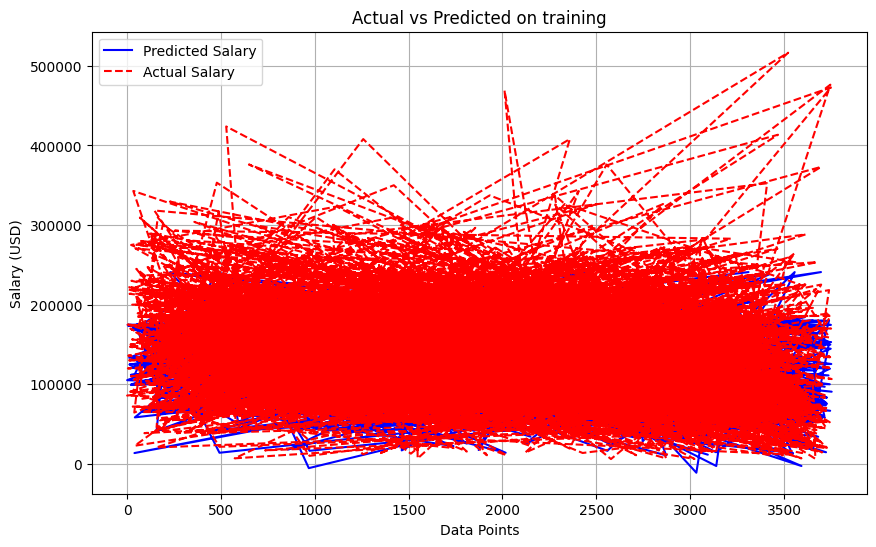

In [ ]:
# Plotting both columns as lines on the same plot with customizations
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Plotting the 'Predicted Salary' with a specific color, linestyle, and label
plt.plot(TrainingDataResults['Predictedadjusted_salary'], color='blue', linestyle='-', label='Predicted Salary')

# Plotting the 'Actual Salary' with a different color, linestyle, and label
plt.plot(TrainingDataResults['adjusted_salary'], color='red', linestyle='--', label='Actual Salary')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('Salary (USD)')
plt.title('Actual vs Predicted on training')

# Adding a legend to differentiate between lines
plt.legend()

# Adding grid lines for better readability
plt.grid(True)

# Show plot
plt.show()


<Axes: title={'center': 'Residual test on training'}>

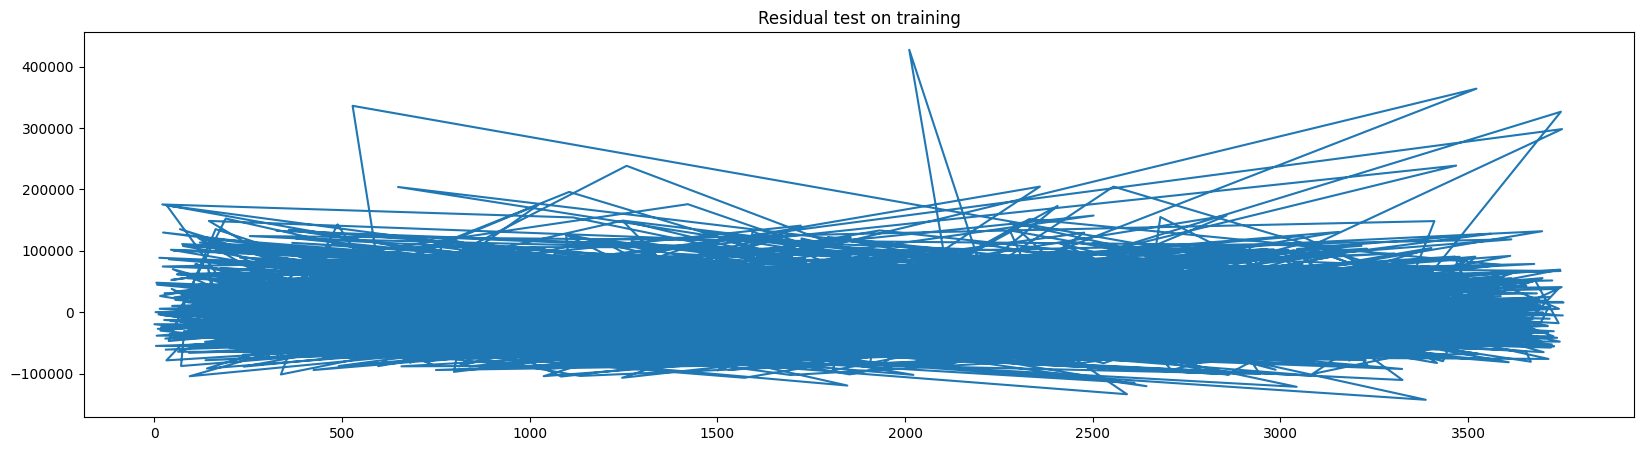

In [ ]:
(TrainingDataResults['adjusted_salary']-TrainingDataResults['Predictedadjusted_salary']).plot(kind="line",figsize = (20,5),title="Residual test on training")

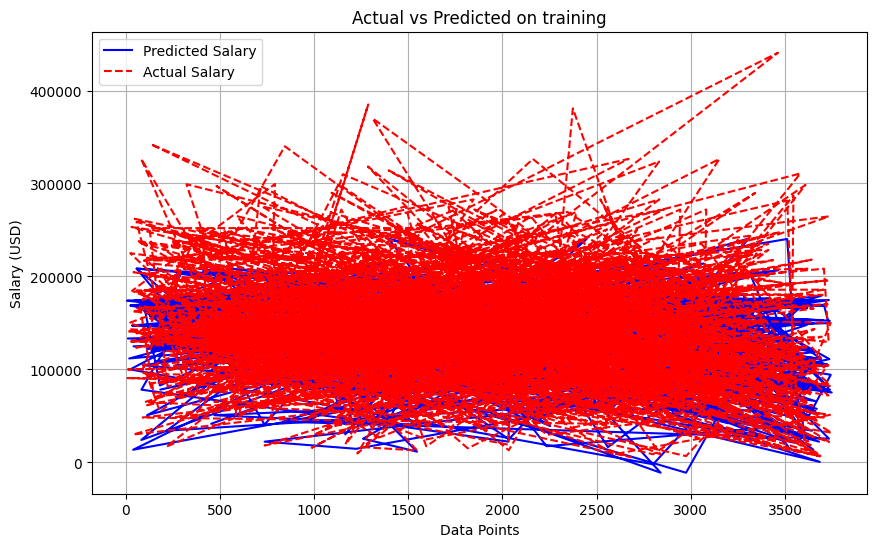

In [ ]:
# Plotting both columns as lines on the same plot with customizations
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Plotting the 'Predicted Salary' with a specific color, linestyle, and label
plt.plot(TestingDataResults['Predictedadjusted_salary'], color='blue', linestyle='-', label='Predicted Salary')

# Plotting the 'Actual Salary' with a different color, linestyle, and label
plt.plot(TestingDataResults['adjusted_salary'], color='red', linestyle='--', label='Actual Salary')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('Salary (USD)')
plt.title('Actual vs Predicted on training')

# Adding a legend to differentiate between lines
plt.legend()

# Adding grid lines for better readability
plt.grid(True)

# Show plot
plt.show()


<Axes: title={'center': 'Residual test'}>

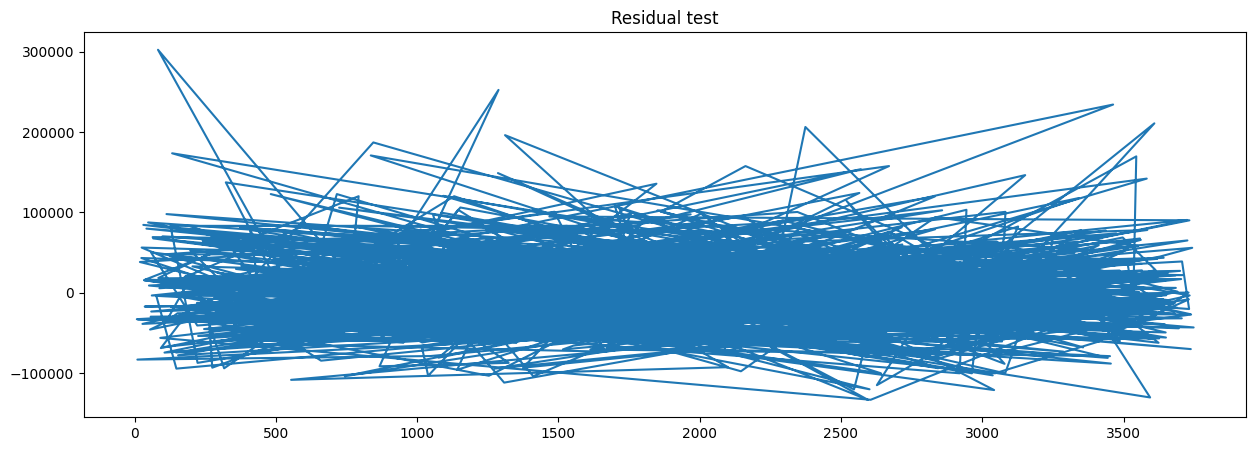

In [ ]:
(TestingDataResults['adjusted_salary']-TestingDataResults['Predictedadjusted_salary']).plot(kind="line",figsize = (15,5),title="Residual test")

In [ ]:
TrainingDataResults['Error'] = TrainingDataResults['adjusted_salary']-TrainingDataResults['Predictedadjusted_salary']
TrainingDataResults

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,remote_ratio_0,remote_ratio_50,remote_ratio_100,job_title_classified_Data Analyst,job_title_classified_Data Architect,job_title_classified_Data Consultant,...,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NA,company_continent_OC,company_continent_SA,adjusted_salary,Predictedadjusted_salary,APE,Error
3327,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,152755.20,173952.0,13.876320,-21196.80
3611,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,0,202694.40,150464.0,25.768053,52230.40
1664,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,115000.00,172032.0,49.593043,-57032.00
897,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,82920.00,153024.0,84.544139,-70104.00
1344,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,185000.00,104512.0,43.507027,80488.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,105500.00,111168.0,5.372512,-5668.00
3587,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,195937.92,169472.0,13.507299,26465.92
1451,0,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,113000.00,171392.0,51.674336,-58392.00
2780,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,153734.40,168832.0,9.820574,-15097.60


In [ ]:
TestingDataResults['Error'] = TestingDataResults['adjusted_salary']-TestingDataResults['Predictedadjusted_salary']
TestingDataResults

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,remote_ratio_0,remote_ratio_50,remote_ratio_100,job_title_classified_Data Analyst,job_title_classified_Data Architect,job_title_classified_Data Consultant,...,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NA,company_continent_OC,company_continent_SA,adjusted_salary,Predictedadjusted_salary,APE,Error
1618,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,120000.000,147264.0,22.720000,-27264.000
1177,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,185900.000,173952.0,6.427111,11948.000
2474,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,126316.800,169472.0,34.164260,-43155.200
2621,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,132736.000,138560.0,4.387657,-5824.000
104,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,132300.000,168832.0,27.613001,-36532.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,19371.840,25536.0,31.820209,-6164.160
221,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,120000.000,132672.0,10.560000,-12672.000
2039,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,119680.000,144064.0,20.374332,-24384.000
3239,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,217600.000,203968.0,6.264706,13632.000


# Modeling & Result #3 (Classification)

จากการสังเกตุผลที่ได้จาก Regression Model เราจึงทดลองนำข้อมูลเงินเดือนมาแบ่งเป็น 3 ช่วง และสร้างโมเดลในการทำนายข้อมูลช่วงเงินเดือนแบบ Classification

In [ ]:
DataForML2 = DataForML

In [ ]:
# Calculate quantiles for salary bin edges
quantiles = [0, 1/3, 2/3, 1]
bin_edges = [DataForML['adjusted_salary'].quantile(q) for q in quantiles]

# Convert the continuous salary variable into 7 discrete bins based on quantiles
salary_labels = ['low','mid','high']
DataForML['salary_range'] = pd.cut(DataForML['adjusted_salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

In [ ]:
DataForML

,adjusted_salary,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,remote_ratio_0,remote_ratio_50,remote_ratio_100,job_title_classified_Data Analyst,job_title_classified_Data Architect,...,residence_continent_NA,residence_continent_OC,residence_continent_SA,company_continent_AF,company_continent_AS,company_continent_EU,company_continent_NA,company_continent_OC,company_continent_SA,salary_range
0,85847.000000,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,low
3,175000.000000,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,high
4,120000.000000,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,mid
5,222200.000000,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,high
6,136000.000000,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,185803.200000,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,high
3750,472852.703232,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,high
3751,170038.080000,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,high
3752,120508.577280,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,mid


In [ ]:
bin_edges

[5583.616, 115000.0, 167116.80000000002, 516465.3312000001]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and testing sets
X = DataForML.drop(["adjusted_salary", "salary_range"], axis=1)
y = DataForML["salary_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.29520766, -0.17982374, -0.51113348, ...,  0.43477216,
        -0.06631617, -0.07588681],
       [-0.29520766, -0.17982374, -0.51113348, ...,  0.43477216,
        -0.06631617, -0.07588681],
       [-0.29520766, -0.17982374,  1.95643612, ...,  0.43477216,
        -0.06631617, -0.07588681],
       ...,
       [-0.29520766, -0.17982374, -0.51113348, ...,  0.43477216,
        -0.06631617, -0.07588681],
       [-0.29520766, -0.17982374, -0.51113348, ...,  0.43477216,
        -0.06631617, -0.07588681],
       [-0.29520766, -0.17982374,  1.95643612, ...,  0.43477216,
        -0.06631617, -0.07588681]])

In [ ]:
from sklearn.linear_model import LogisticRegression
models = [('Logistic Regression', LogisticRegression(max_iter=1000))]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(max_iter=1000)

# Train the model
lgr.fit(X_train, y_train)

# Make predictions
y_pred_train = lgr.predict(X_train)
y_pred_test = lgr.predict(X_test)

In [ ]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df_result

,Actual,Predicted
3020,mid,high
847,mid,high
325,high,mid
2363,high,high
1401,mid,high
...,...,...
769,high,low
212,high,high
3379,mid,high
1102,mid,high


In [ ]:
from sklearn.metrics import classification_report
print("\nClassification Train Report:")
print(classification_report(y_train, y_pred_train))

from sklearn.metrics import classification_report
print("\nClassification Test Report:")
print(classification_report(y_test, y_pred_test))


Classification Train Report:
              precision    recall  f1-score   support

        high       0.50      0.83      0.63       993
         low       0.72      0.65      0.68      1007
         mid       0.44      0.19      0.27       969

    accuracy                           0.56      2969
   macro avg       0.55      0.56      0.53      2969
weighted avg       0.56      0.56      0.53      2969


Classification Test Report:
              precision    recall  f1-score   support

        high       0.49      0.79      0.60       243
         low       0.67      0.63      0.65       241
         mid       0.43      0.20      0.28       259

    accuracy                           0.53       743
   macro avg       0.53      0.54      0.51       743
weighted avg       0.53      0.53      0.51       743



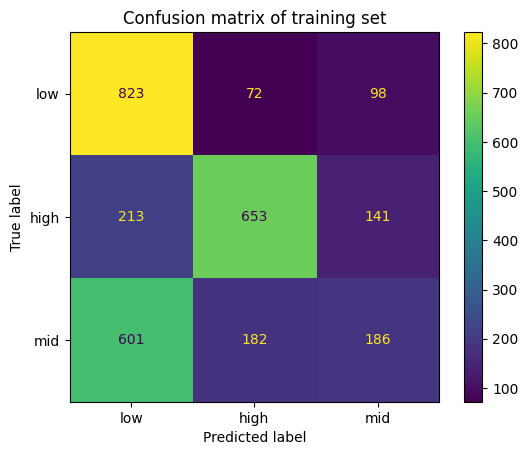

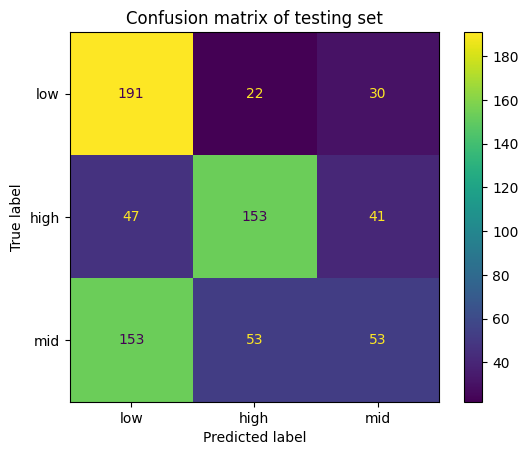

In [ ]:
# Plot confusion matrix of training set
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_train)))
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of testing set')
plt.show()

# Result Analysis #3

จากการ Train Model ได้
- Accuracy Train data 0.56
- Accuracy Test data อยู่ที่ 0.53

พบว่ามากกว่าการทำนายเงินเดือนแบบ Regression เนื่องจากมี Range ในการทำนายที่มากกว่า

**สรุปได้ว่า** โมเดลสามารถทำนาย Range ของเงินเดือนที่เราสามารถขอกับทางบริษัทในการสมัครงานเกี่ยวกับ Data Science ด้วยปัจจัยต่าง ๆ ที่เกี่ยวข้องกับการทำงานได้ แต่ด้วยข้อมูลที่มีเพียงข้อมูลในปี 2020-2023 และข้อมูลใน 2020,2021 ถือว่ามีน้อยมากเมื่อเทียบกับ 2022และ2023 อาจจะทำให้โมเดลยังมีข้อมูลที่ไม่เพียงพอในการทำนายอย่างมีประสิทธิภาพมากพอ